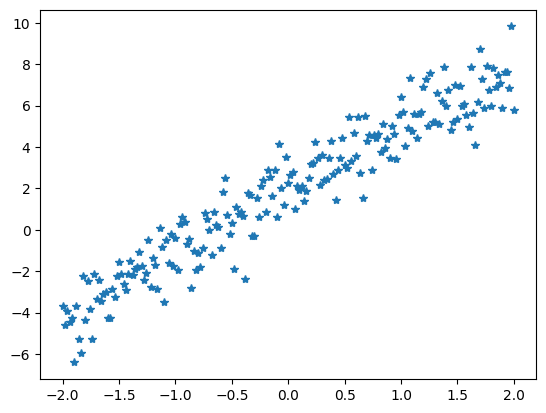

In [46]:
# Aprendendo a tratar dados
import tensorflow as tf
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

noise = tf.random.normal(shape=[NUM_EXAMPLES])

y = f(x) + noise

plt.plot(x, y, '*')
plt.show()

In [45]:
import tensorflow as tf

def parse_object_to_tensor(obj):
    tensor = []
    for key in obj:
        if type(obj[key]) is dict:
            for dpth_key in obj[key]:
                tensor.append(tf.data.TextLineDataset(obj[key][dpth_key]))
        else:
            tensor.append(tf.data.TextLineDataset(obj[key]))
    return tensor

obj = {"a": "12", "b": {"nm": "13"}, "c": "ajsodjsa"}

a = tf.data.experimental.SqlDataset('bigQuery', 'an', "SELECT * FROM ALL")

print(a)

<_TensorDataset element_spec=DatasetSpec(TensorSpec(shape=(), dtype=tf.string, name=None), TensorShape([3]))>


In [1]:
# Obtendo dados do BiqQuery
from google.cloud import bigquery
import json
import pandas as pd

client = bigquery.Client()

query_job = client.query(
    """
    SELECT * FROM `growyxprod.firebase_projects.post_schema_projectPositions_latest` LIMIT 150
    """
)

result = query_job.result()

tensor = []

for row in result:
    tensor.append(json.loads(row.positions_member))

# print(tensor)

df = pd.json_normalize(tensor)

df['jobTitle'] = df['jobTitle'].fillna(0)
df['skills'] = df['skills'].fillna('[]')
df['skills'] = ','.join(df['skills'][0])
df['softwares'] = ','.join(df['softwares'][0])
df['codeLanguage'] = ','.join(df['codeLanguage'][0])
# df.drop(df[(df['jobTitle'] == 0)].index, inplace=True)
# print(df.head())
candidate = df.pop('database')

df.head()


,codeLanguage,softwares,jobTitle,skills
0,React,,0,"[,]"
1,React,,Project manager,"[,]"
2,React,,UX Designer,"[,]"
3,React,,Developer front-end,"[,]"
4,React,,Developer back-end,"[,]"


In [2]:

selecteds_query_job = client.query(
    """
    SELECT quizPersonality_profile_personal, quizSoftSkills_profile_trustiness,
     quizSoftSkills_profile_innovation, quizSoftSkills_profile_purpose,
     quizSoftSkills_profile_mentalSecurity, quizSoftSkills_profile_totalPoints,
     quizSoftSkills_profile_teamWork, quizSoftSkills_profile_level,
       wages_currency, wages_hourGrossValue,
       experience_jobTitle, experience_level, experience_workAvailability,
        quizCulture_profile_adhocracia, quizCulture_profile_cla,
         quizCulture_profile_hierarchy, quizCulture_profile_market,
          quizPersonality_profile_calm, quizPersonality_profile_selfEsteem, 
           quizPersonality_profile_trustworthy, quizPersonality_profile_conformity,
            quizPersonality_profile_discerening, quizPersonality_profile_careful,
             quizPersonality_profile_dominance, quizPersonality_profile_enthusiastic,
              quizPersonality_profile_spontaneous, quizPersonality_profile_stability,
               quizPersonality_profile_influence, quizPersonality_profile_influencer,
                quizPersonality_profile_selfish, quizPersonality_profile_objective,
                 quizPersonality_profile_organized, quizPersonality_profile_optimist,
                  quizPersonality_profile_listener, quizPersonality_profile_patient,
                   quizPersonality_profile_persuasive, quizPersonality_profile_planner,
                    quizPersonality_profile_precision, quizPersonality_profile_radical,
                     quizPersonality_profile_visionary,  FROM `growyxprod.firestore_export.posts_schema_bqUsers_latest` LIMIT 150
    """
)

selectedes = selecteds_query_job.to_arrow().to_pandas()

dt = selectedes
# dt.drop(['document_name', 'document_id', 'timestamp', 'operation', 'login_providerId'], axis='columns', inplace=True)
ks = pd.DataFrame(dt)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_currency,wages_hourGrossValue,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,None,None,None,None,None,None,None,BRL,25,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,18.000000000,13.000000000,16.000000000,15.000000000,78.000000000,16.000000000,None,BRL,56,...,60.000000000,100.000000000,100.000000000,60.000000000,100.000000000,80.000000000,100.000000000,100.000000000,100.000000000,80.000000000


In [3]:
strData = ks[['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability']].copy()
ks = ks.drop(['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability'], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,None,None,None,None,None,None,None,25,None,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,18.000000000,13.000000000,16.000000000,15.000000000,78.000000000,16.000000000,None,56,0E-9,...,60.000000000,100.000000000,100.000000000,60.000000000,100.000000000,80.000000000,100.000000000,100.000000000,100.000000000,80.000000000


In [4]:
strData.head()

,wages_currency,experience_jobTitle,experience_level,experience_workAvailability
0,BRL,developer back-end,None,part-time
1,None,None,,None
2,None,,Pleno,Full-time
3,None,None,None,None
4,BRL,ui designer,Sênior,Hora


In [5]:
# strData.fillna("Noe", inplace=True)
strData = strData.apply(pd.get_dummies, dtype=int)
strData.head()

ValueError: If using all scalar values, you must pass an index

In [6]:
ks.fillna(0, inplace=True)
ks = ks.apply(pd.to_numeric, errors='coerce')
# ks = pd.concat([ks, strData], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,0,0,0,0,0,0,0,0,25.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,18,13,16,15,78,16,0,56.0,0,...,60,100,100,60,100,80,100,100,100,80


In [18]:
f = ks.to_dict().values()
for key in f:
    print(type(key), key)

# df.head(80)

<class 'dict'> {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0

In [9]:
df.replace( '', 'a', inplace=True)
ks.replace('', 0, inplace=True)

In [17]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices(dict(ks))

for feat in dataset.take(20):
    print('Feature: {}'.format(feat))


Feature: {'quizPersonality_profile_personal': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'quizSoftSkills_profile_trustiness': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'quizSoftSkills_profile_innovation': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'quizSoftSkills_profile_purpose': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'quizSoftSkills_profile_mentalSecurity': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'quizSoftSkills_profile_totalPoints': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'quizSoftSkills_profile_teamWork': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'quizSoftSkills_profile_level': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'wages_hourGrossValue': <tf.Tensor: shape=(), dtype=float64, numpy=25.0>, 'quizCulture_profile_adhocracia': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'quizCulture_profile_cla': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'quizCulture_profile_hierarchy': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'quizCulture_profile_market': <tf.Ten